In [6]:
import pandas as pd

file_path = r"C:\Users\ACER\Downloads\CWR2080___PYTHON\CWR2080 _ PYTHON\Dataset.csv"

try:
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display dataset info
    print("Dataset Information:")
    print(df.info())

    # Display all rows and columns
    pd.set_option('display.max_rows', None)  # Show all rows
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', 1000)  # Prevents column truncation

    print("\nFull Dataset:")
    print(df)

except FileNotFoundError:
    print("Error: The file was not found. Please check the file path.")

except Exception as e:
    print(f"An error occurred: {e}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None

Full Dataset:
      order_id  customer_id                        restaurant_name    cuisine_type  cost_of_the_order day_of_the_week     rating  food_preparation_time  delivery_time
0      1477147       337525                       

Handle Missing and Inconsistent Data

In [7]:
# Replace 'Not given' with NaN and fill NaN values with mean rating
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Convert to numeric, set errors as NaN
df['rating'].fillna(df['rating'].mean(), inplace=True)  # Fill missing ratings with average

# Convert numerical columns to correct data types
df['cost_of_the_order'] = pd.to_numeric(df['cost_of_the_order'])
df['food_preparation_time'] = pd.to_numeric(df['food_preparation_time'])
df['delivery_time'] = pd.to_numeric(df['delivery_time'])

# Confirm changes
print("\nMissing Values After Handling:")
print(df.isnull().sum())

print("\nUpdated Data Types:")
print(df.dtypes)



Missing Values After Handling:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Updated Data Types:
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                   float64
food_preparation_time      int64
delivery_time              int64
dtype: object


C:\Users\ACER\AppData\Local\Temp\ipykernel_23376\4290212490.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(), inplace=True)  # Fill missing ratings with average


Exploratory Data Analysis (EDA)

-Distribution of order costs
-Average rating per cuisine type
-Relationship between preparation time and delivery time

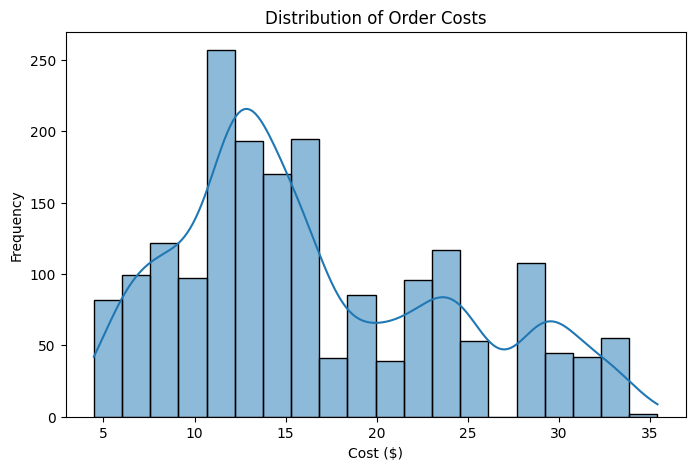

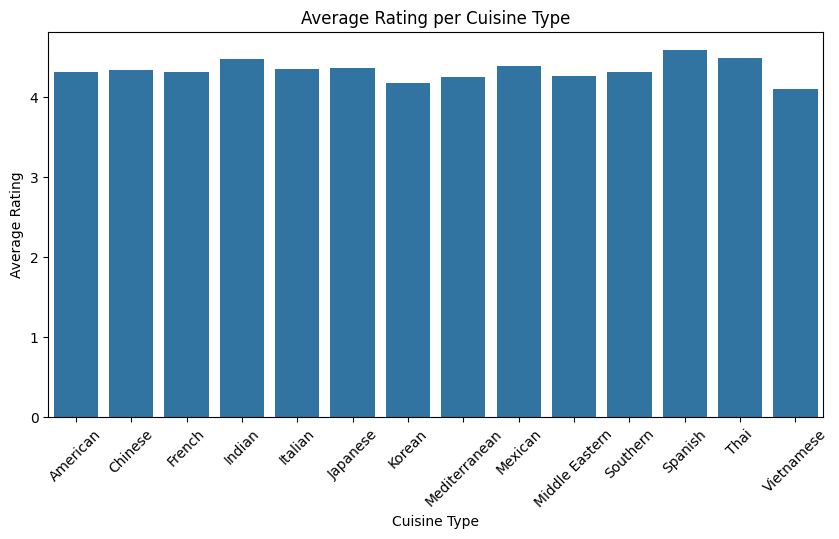

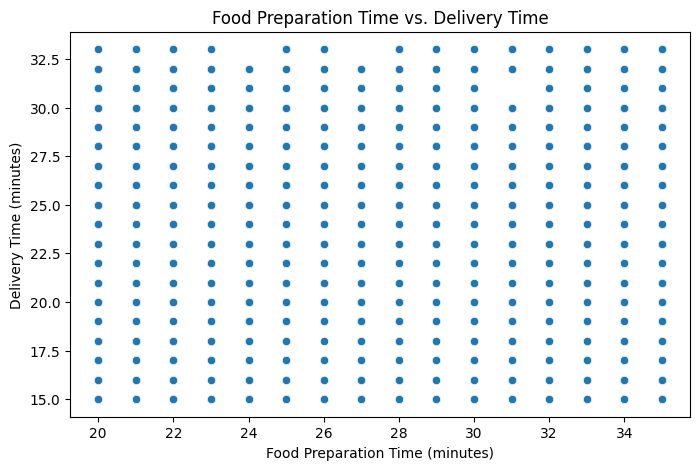

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of order costs
plt.figure(figsize=(8,5))
sns.histplot(df['cost_of_the_order'], bins=20, kde=True)
plt.title("Distribution of Order Costs")
plt.xlabel("Cost ($)")
plt.ylabel("Frequency")
plt.show()

# Average rating per cuisine type
plt.figure(figsize=(10,5))
sns.barplot(x=df.groupby('cuisine_type')['rating'].mean().index, 
            y=df.groupby('cuisine_type')['rating'].mean().values)
plt.xticks(rotation=45)
plt.title("Average Rating per Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Average Rating")
plt.show()

# Relationship between preparation time and delivery time
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['food_preparation_time'], y=df['delivery_time'])
plt.title("Food Preparation Time vs. Delivery Time")
plt.xlabel("Food Preparation Time (minutes)")
plt.ylabel("Delivery Time (minutes)")
plt.show()


Statistical Analysis

-Check if order cost differs between weekends and weekdays
-Correlation between preparation time and rating

In [9]:
from scipy.stats import ttest_ind

# Check if order cost differs between weekends and weekdays
weekend_orders = df[df['day_of_the_week'] == 'Weekend']['cost_of_the_order']
weekday_orders = df[df['day_of_the_week'] == 'Weekday']['cost_of_the_order']

t_stat, p_value = ttest_ind(weekend_orders, weekday_orders)

print(f"T-test result for order cost between weekdays and weekends: p-value = {p_value}")

# Correlation between preparation time and rating
correlation = df[['food_preparation_time', 'rating']].corr()
print("\nCorrelation between preparation time and rating:")
print(correlation)


T-test result for order cost between weekdays and weekends: p-value = 0.48711422072696897

Correlation between preparation time and rating:
                       food_preparation_time    rating
food_preparation_time               1.000000 -0.004805
rating                             -0.004805  1.000000


Machine Learning Model (Predicting Delivery Time)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Select features and target variable
X = df[['cost_of_the_order', 'food_preparation_time']]
y = df['delivery_time']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of Delivery Time Prediction: {mae}")


Mean Absolute Error of Delivery Time Prediction: 4.081661923093686
